# Analisis exploratorio

### Links
- [SentenceTransformers](https://www.sbert.net/)
- [UMAP](https://umap-learn.readthedocs.io/en/latest)
- [Plotting UMAP results](https://umap-learn.readthedocs.io/en/latest/plotting.html)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

from matplotlib import pyplot as plt
import seaborn  as sns

import numpy  as np
import pandas as pd
import torch

import logging
import random

import data  as dt
import model as ml
import util  as ut
import pytorch_common.util as pu

## Setup

In [3]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.__version__

'1.12.1+cu116'

In [6]:
pu.set_device_name('gpu')

logging.info(pu.get_device())

2022-08-29 21:49:12,697 - INFO - cuda:0


In [7]:
torch.cuda.get_arch_list()

['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']

In [8]:
def set_seed(value):
    random.seed(value)
    np.random.seed(value)
    torch.manual_seed(value)

In [9]:
set_seed(42)

In [10]:
DATASET_PATH = '../datasets'

In [11]:
def plot_categories(groups):
    plt.figure(figsize=(15,7))
    ax = sns.barplot(x=groups['category'], y='title', data=groups)
    ax.set(xlabel=None)
    ax.set(xticklabels=[])
    plt.show()

## Preparar dataset

In [12]:
dataset = pd.read_csv(f'{DATASET_PATH}/ebay-all.csv')
dataset.head()

title 
 category 
 category_seq 
 
 
 
 
 0 
 Mrs Sinclair's Suitcase: 'A heart-breaking tal... 
 eBay ~ Books, Comics & Magazines ~ Books 
 0 
 
 
 1 
 Stone Mothers: The addictive new thriller from... 
 eBay ~ Books, Comics & Magazines ~ Books 
 0 
 
 
 2 
 Don't Close Your Eyes: The astonishing psychol... 
 eBay ~ Books, Comics & Magazines ~ Books 
 0 
 
 
 3 
 Regency Scandal: Dissolute Ways: The Runaway C... 
 eBay ~ Books, Comics & Magazines ~ Books 
 0 
 
 
 4 
 Gone Without A Trace: a gripping psychological... 
 eBay ~ Books, Comics & Magazines ~ Books 
 0

# Visualización de categorias de productos

In [13]:
category_branches = dataset['category']
category_branches.head()

0    eBay ~ Books, Comics & Magazines ~ Books
1    eBay ~ Books, Comics & Magazines ~ Books
2    eBay ~ Books, Comics & Magazines ~ Books
3    eBay ~ Books, Comics & Magazines ~ Books
4    eBay ~ Books, Comics & Magazines ~ Books
Name: category, dtype: object

In [14]:
def branches_to_data_frame(values, separator='~'):
    data = []
    for i, b in enumerate(values):
        nodes = b.split(separator)
        for idx in range(len(nodes)-1):
            data.append((nodes[idx].strip(), nodes[idx+1].strip()))
    return pd.DataFrame(data, columns=['source', 'target'])

In [15]:
df = branches_to_data_frame(category_branches)

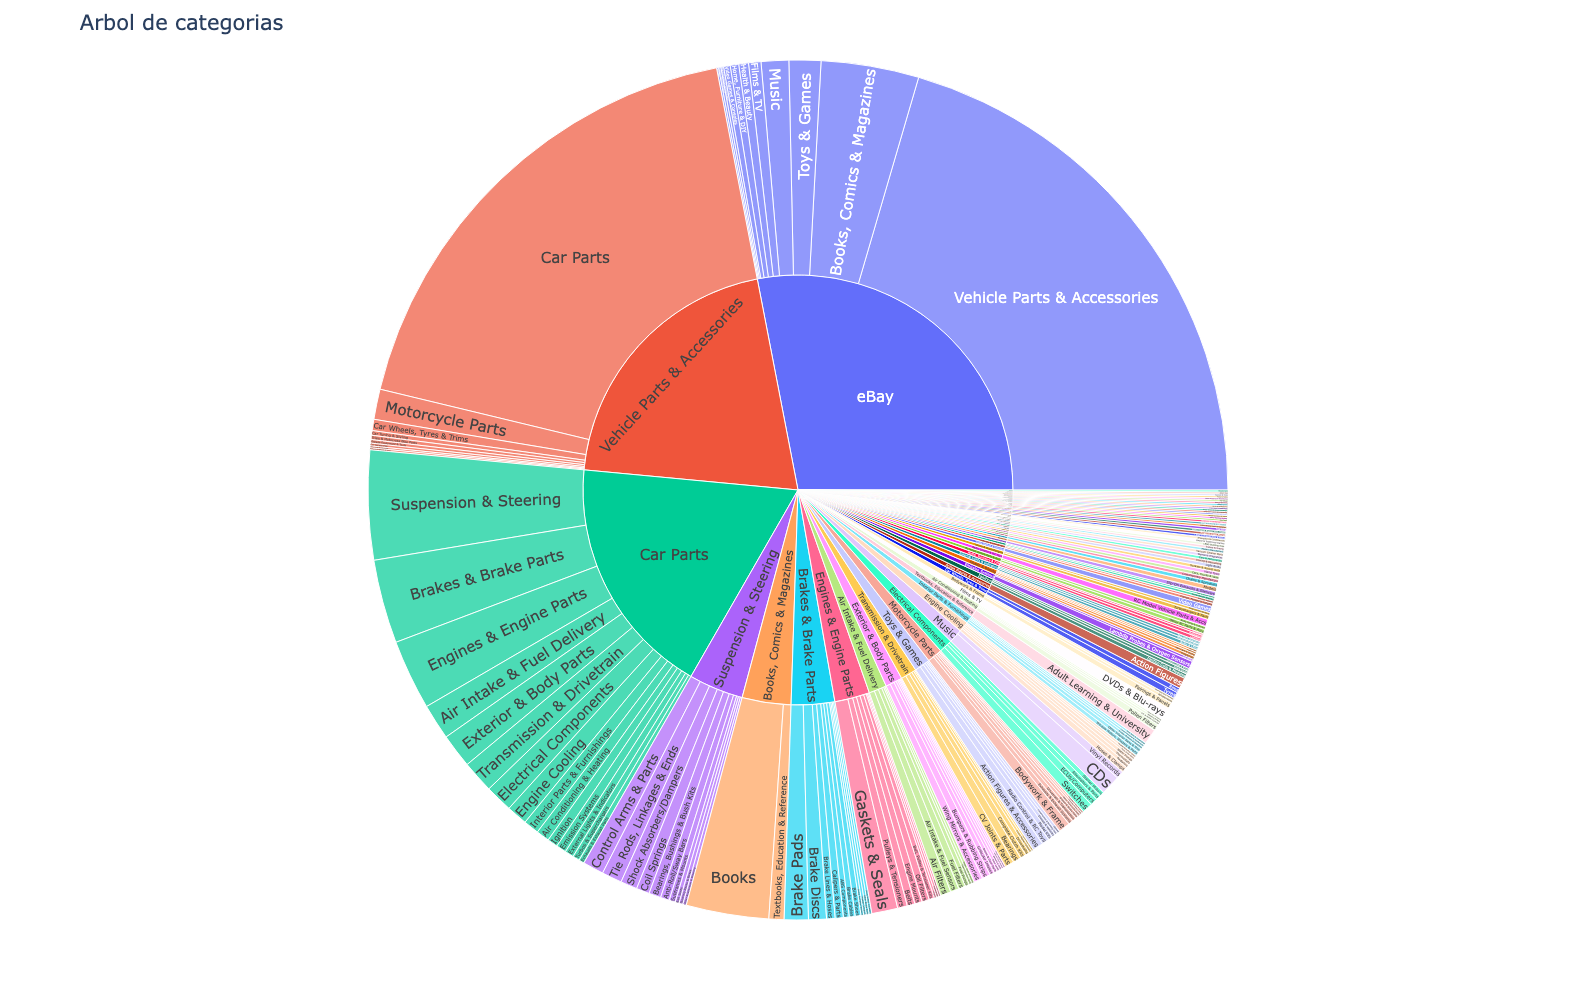

In [16]:
dt.plot_tree(df, title="Arbol de categorias")

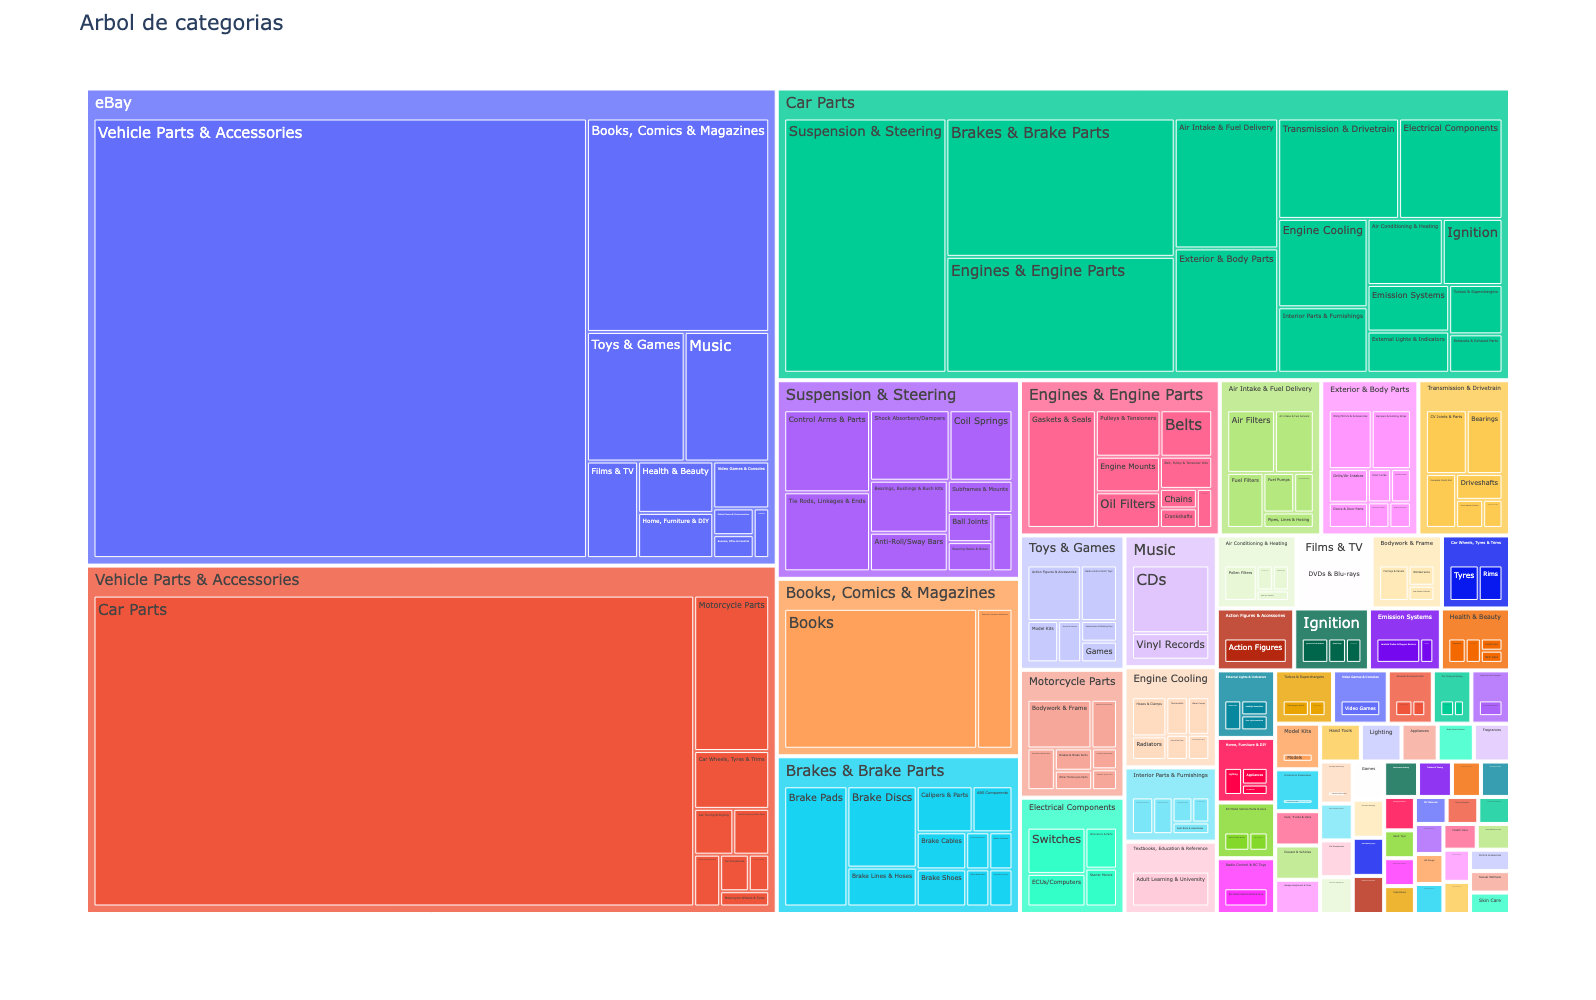

In [17]:
dt.plot_tree(df, title="Arbol de categorias", figure='treemap')

## Cantidad de productos por categoria

<Figure size 1080x504 with 1 Axes>

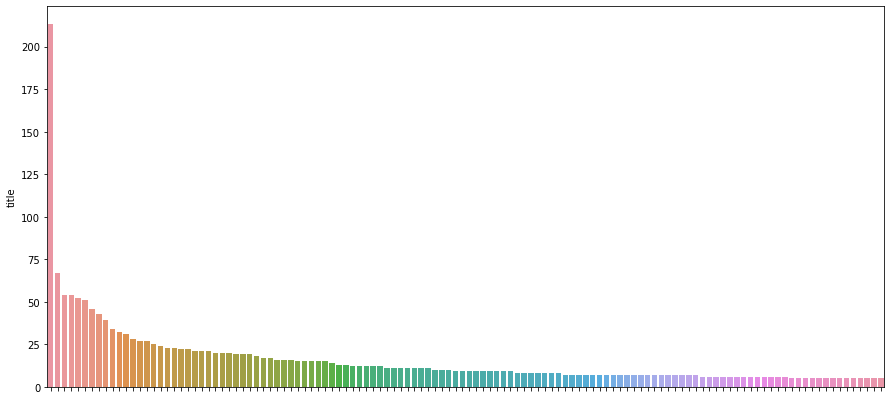

In [18]:
plot_categories(ut.group_by_count(dataset, ['category'], 'title'))

## Cluster de categorias

In [19]:
sentence_encoder = ml.SentenceEncoder('all-MiniLM-L6-v2')

2022-08-29 21:49:13,816 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-08-29 21:49:14,075 - INFO - Use pytorch device: cuda


Batches:   0%|          | 0/61 [00:00<?, ?it/s]

<model.umap.UMAP object at 0x7f22f7996530>

<Figure size 1000x1000 with 1 Axes>

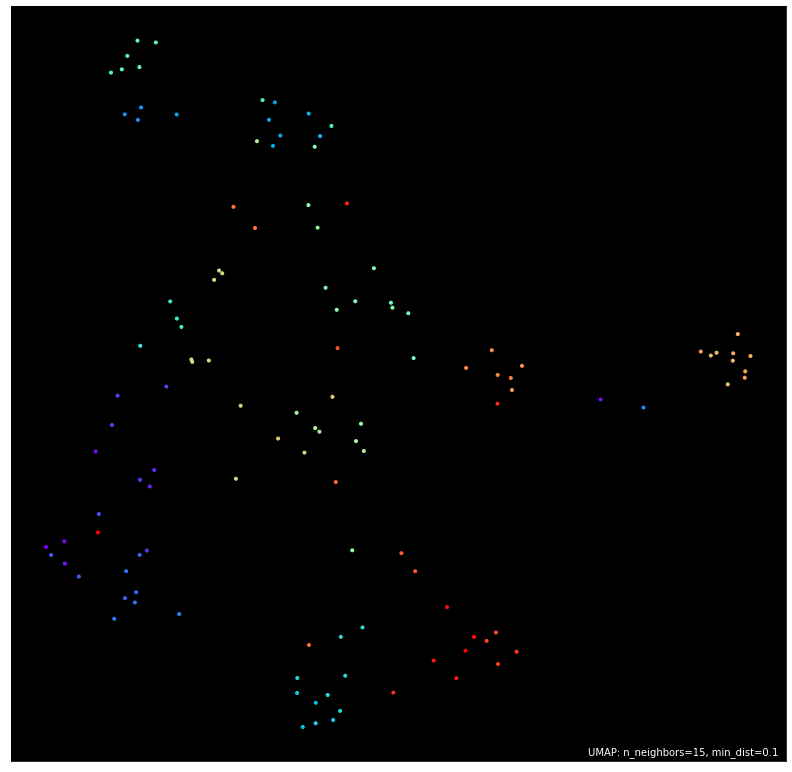

<Figure size 1000x1000 with 1 Axes>

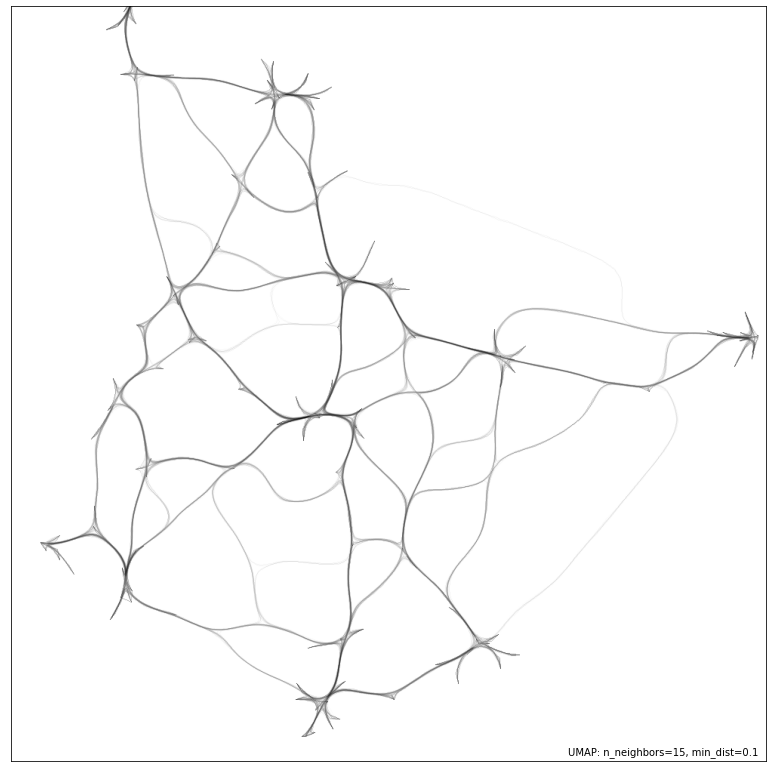

In [20]:
category_embeddindgs = sentence_encoder(dataset['category'])

ml.UMAP(category_embeddindgs) \
    .plot_clusters(labels=dataset['category']) \
    .plot_connectivity()

## Cluster de productos por similitud entre titulos

Batches:   0%|          | 0/61 [00:00<?, ?it/s]

<model.umap.UMAP object at 0x7f228ccbcd30>

<Figure size 1000x1000 with 1 Axes>

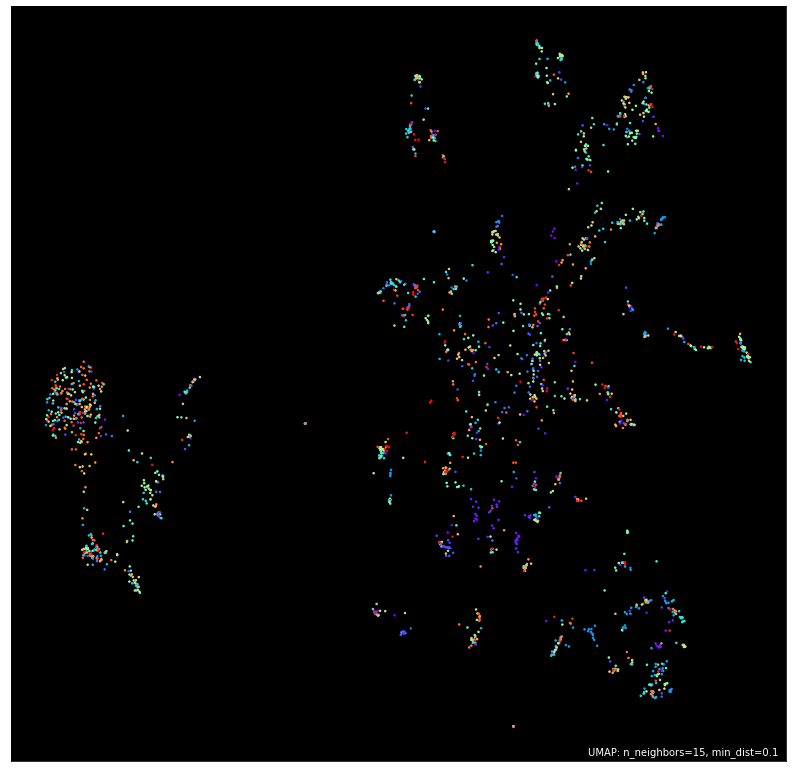

<Figure size 1000x1000 with 1 Axes>

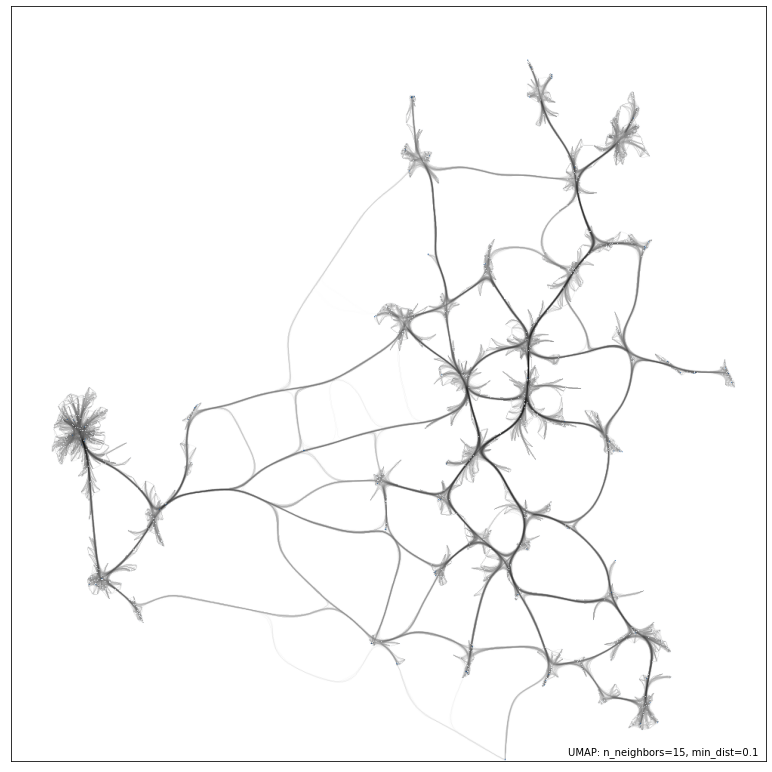

In [21]:
title_embeddindgs  = sentence_encoder(dataset['title'])

ml.UMAP(title_embeddindgs) \
    .plot_clusters(labels=dataset['title']) \
    .plot_connectivity()